# Abstract
This notebook aims to create a robust predictive model for anticipating hotel reservation cancellations, addressing overbooking issues. By leveraging advanced data analysis, it seeks to help hotels optimize bookings, reduce revenue loss, and enhance customer satisfaction. The goal is to improve overall hotel management and operations.

## 1. Data exploration

1.1 Importing libraries

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

1.2 Load data

In [13]:
ds = pd.read_csv("Hotel Reservations.csv")
ds.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,...,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,...,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,...,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,...,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,...,0,0,94.50,0,Canceled


In [5]:
print(f"Dataset shape: {ds.shape}\n")
ds.info()

Dataset shape: (36275, 19)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  

1.3 First feature selection

In [14]:
ds = ds[[#'Booking_ID',
        'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', #'type_of_meal_plan', 'required_car_parking_space',
       'lead_time', #'room_type_reserved',  'arrival_year',
       'arrival_month', #'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status']].copy()

ds['no_of_adults'] = ds['no_of_adults'].astype(int)
ds['no_of_children'] =  ds['no_of_children'].astype(int)
ds['no_of_weekend_nights'] =  ds['no_of_weekend_nights'] .astype(int)
ds['no_of_week_nights'] =  ds['no_of_week_nights'].astype(int)
ds['lead_time'] = ds['lead_time'] .astype(int)
ds['arrival_month'] =  ds['arrival_month'].astype('category')
ds['no_of_previous_cancellations'] =  ds['no_of_previous_cancellations'].astype(int)
ds['no_of_previous_bookings_not_canceled'] =  ds['no_of_previous_bookings_not_canceled'].astype(int)
ds['avg_price_per_room'] =  ds['avg_price_per_room'].astype(int)
ds['no_of_special_requests'] =  ds['no_of_special_requests'].astype(int)
ds['booking_status'] =  (ds["booking_status"] == "Canceled").astype(int).astype('category')

In [7]:
ds.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,85.232557,0.023349,0.153411,103.157298,0.619655
std,0.518715,0.402648,0.870644,1.410905,85.930817,0.368331,1.754171,35.066193,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,0.000000,0.000000,80.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,57.000000,0.000000,0.000000,99.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,126.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,443.000000,13.000000,58.000000,540.000000,5.000000


## 2. Data visualization

2.1 Plots

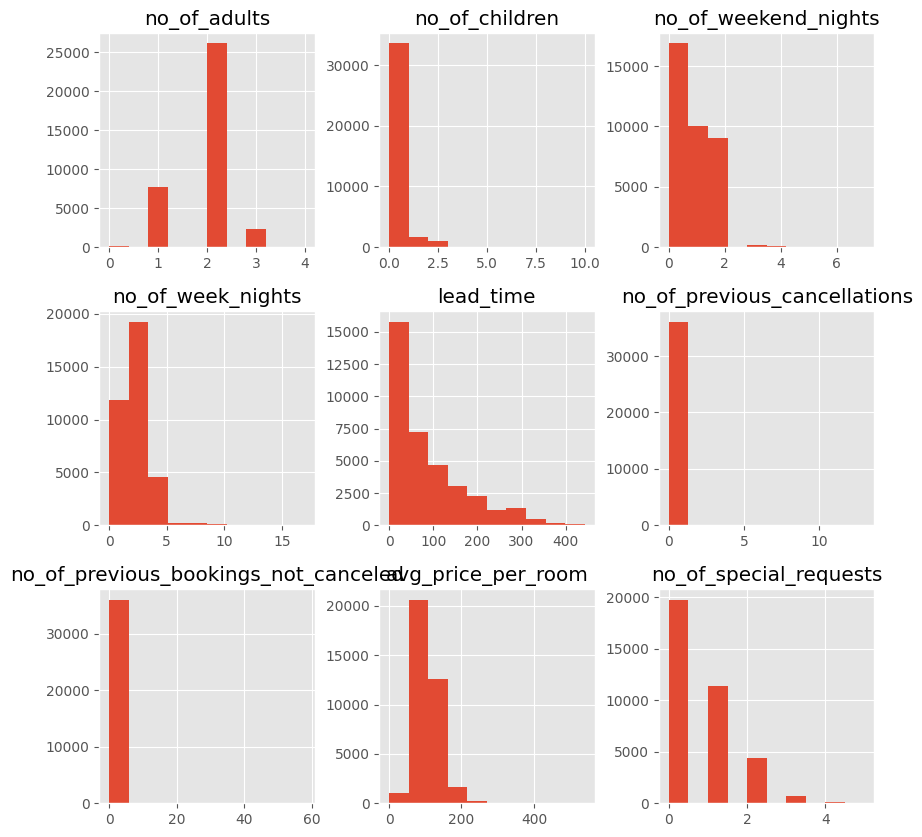

In [15]:
ds.hist(figsize=(10, 10))
plt.show()

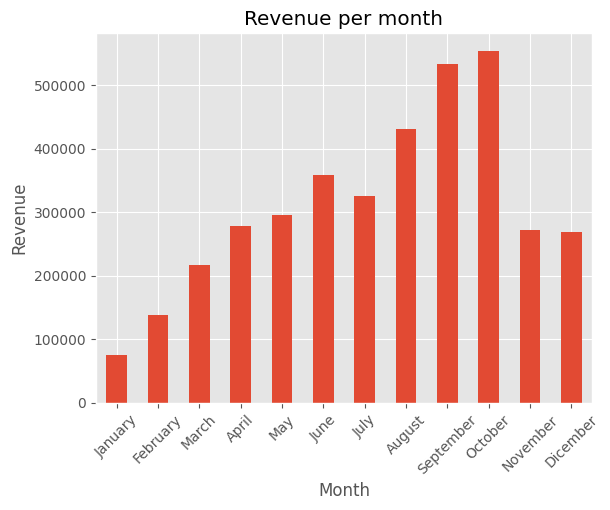

In [16]:
ds.groupby("arrival_month").sum("avg_price_per_room")['avg_price_per_room'].plot.bar()
plt.title("Revenue per month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(ticks=range(0,12),
           labels=["January", "February", "March", "April",
                   "May", "June", "July", "August",
                   "September", "October", "November", "Dicember"],
           rotation = 45)
plt.show()

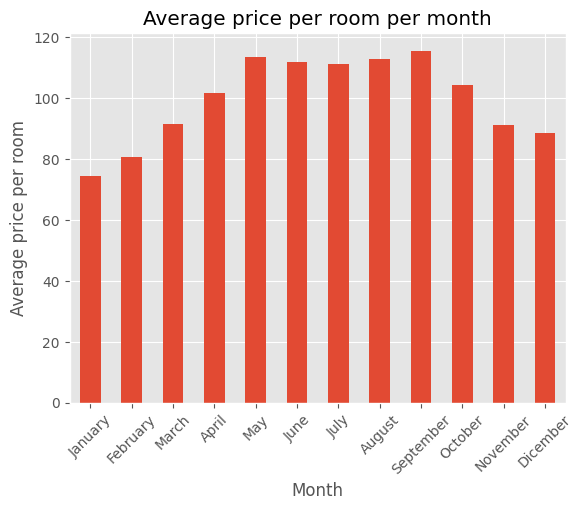

In [17]:
ds.groupby("arrival_month").mean("avg_price_per_room")['avg_price_per_room'].plot.bar()
plt.title("Average price per room per month")
plt.xlabel("Month")
plt.ylabel("Average price per room")
plt.xticks(ticks=range(0,12),
           labels=["January", "February", "March", "April",
                   "May", "June", "July", "August",
                   "September", "October", "November", "Dicember"],
           rotation = 45)
plt.show()

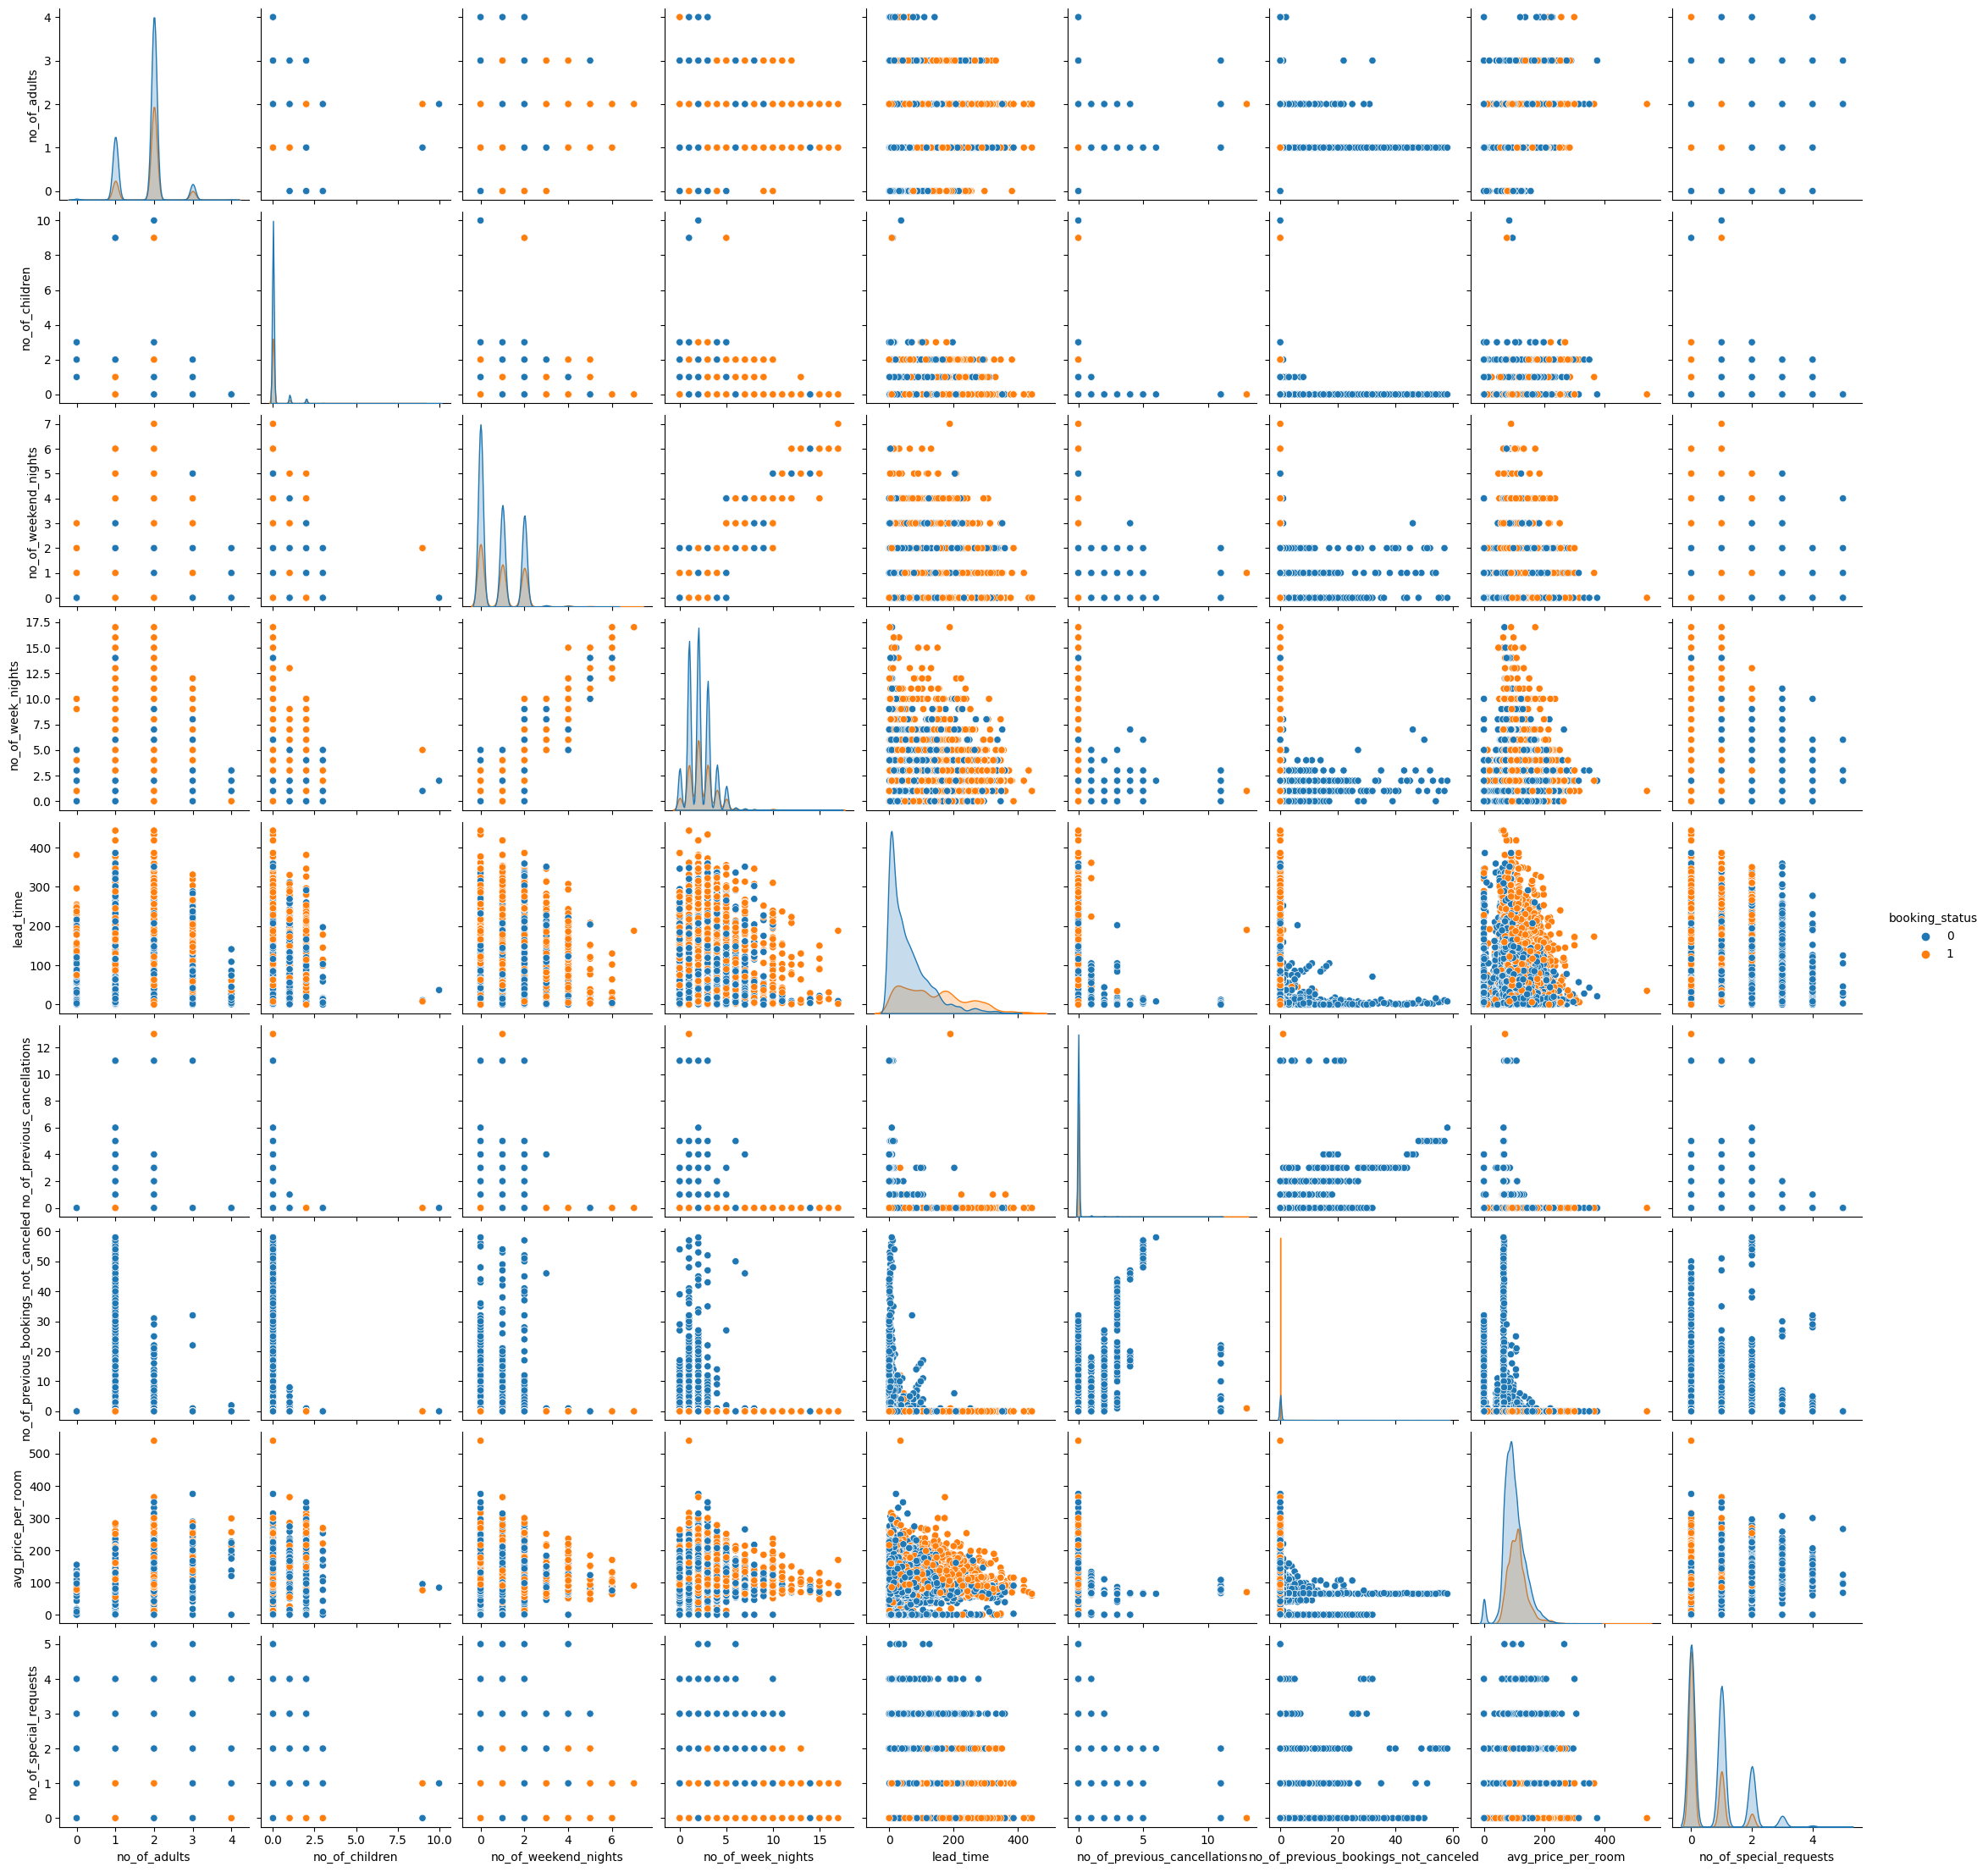

In [ ]:
sns.pairplot(ds, hue="booking_status")
plt.show()

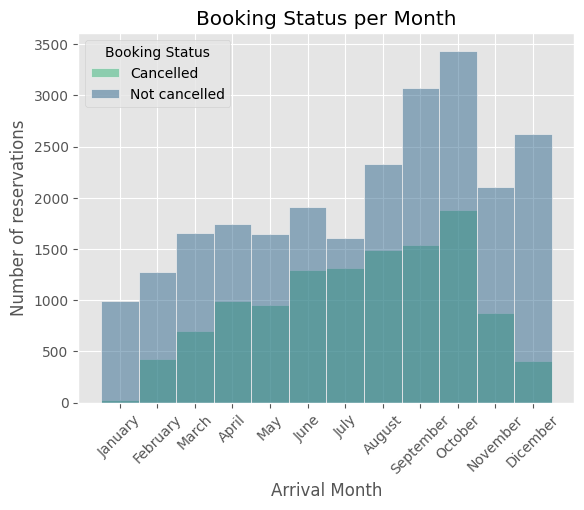

In [10]:
ax = sns.histplot(
    data=ds,
    x = "arrival_month",
    hue = "booking_status",
    palette='viridis')

plt.xticks(ticks=range(1,13),
           labels=["January", "February", "March", "April",
                   "May", "June", "July", "August",
                   "September", "October", "November", "Dicember"],
           rotation = 45)

plt.ylabel("Number of reservations")
plt.xlabel('Arrival Month')
plt.legend(["Cancelled", "Not cancelled"], title = "Booking Status")
plt.title('Booking Status per Month')
plt.show(ax)

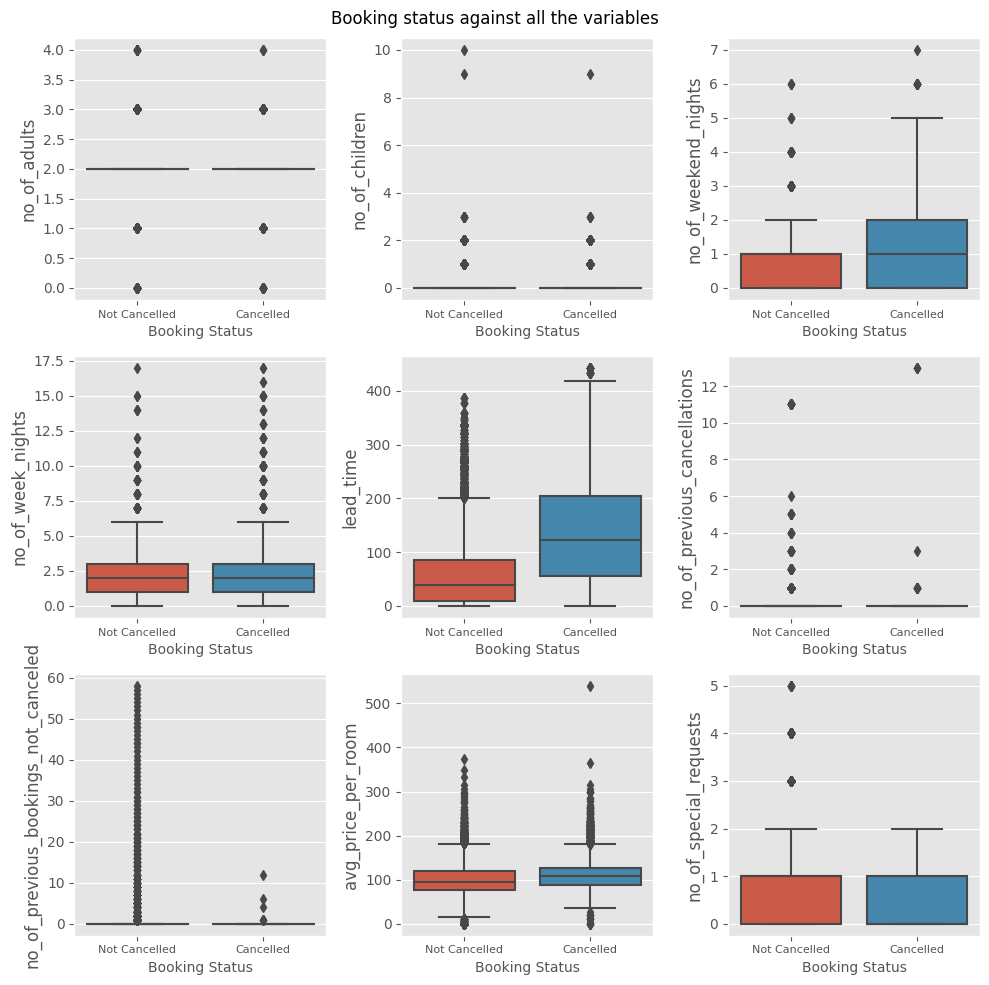

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10), tight_layout = True)
fig.suptitle("Booking status against all the variables")
ds_plot = ds.drop(columns=["arrival_month"]).copy()

for i, var in enumerate(ds_plot.iloc[:,:-1].columns):
    sns.boxplot(
        data=ds_plot,
        ax = axes[i//3, i%3],
        y = var, x = "booking_status")

    axes[i//3, i%3].set_xlabel("Booking Status", fontsize=10)

    axes[i//3, i%3].set_xticks(
        ticks=[0, 1],
        labels=["Not Cancelled", "Cancelled"],
        fontsize=8)

2.2 Correlation <br/>
<i>There are no pair of features with high correlation</i>

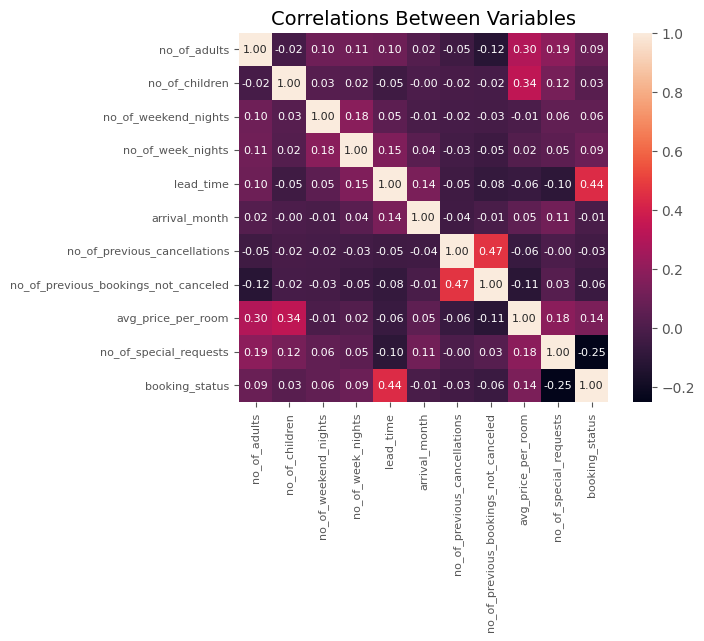

In [12]:
sns.heatmap(
    ds.corr(),
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws={"fontsize":8})

plt.title('Correlations Between Variables',size=14)
plt.xticks(size=13, fontsize = 8)
plt.yticks(size=13, fontsize = 8)
plt.show()

2.4 Cluster Analysis<br>
<i>Using K-means</i>

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
#Scaling the dataset
scaler = StandardScaler()
scale = scaler.fit_transform(ds)
ds_scale = pd.DataFrame(scale, columns = ds.columns);
ds_scale.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0.298893,-0.26147,0.217401,-0.144803,1.614896,...,-0.063393,-0.087456,-1.088166,-0.78814,-0.698062
1,0.298893,-0.26147,1.365993,0.563972,-0.933701,...,-0.063393,-0.087456,0.081068,0.48376,-0.698062
2,-1.628975,-0.26147,1.365993,-0.853578,-0.980250,...,-0.063393,-0.087456,-1.230755,-0.78814,1.432539
3,0.298893,-0.26147,-0.931190,-0.144803,1.463610,...,-0.063393,-0.087456,-0.090039,-0.78814,1.432539
4,0.298893,-0.26147,0.217401,-0.853578,-0.433291,...,-0.063393,-0.087456,-0.261147,-0.78814,1.432539


In [20]:
#Principal Component Analysis
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ds_scale)
pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-0.047750,-1.276369
1,-0.182922,0.981481
2,1.163718,-1.490206
3,-0.725416,-1.793006
4,-0.000476,-0.943698


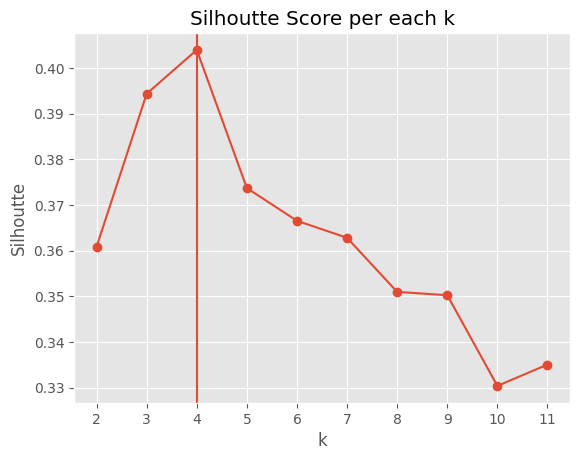

In [21]:
#Plot the best k for the K-means
scores = []

for n_clusters in range(2, 12):
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto")
    preds = clusterer.fit_predict(pca_df)
    scores.append(silhouette_score(pca_df, preds))

plt.plot(range(2, 12), scores, '-o')
plt.title("Silhoutte Score per each k")
plt.xlabel("k")
plt.ylabel("Silhoutte")
plt.axvline(x=scores.index(max(scores)) + 2)
plt.xticks(range(2,12))
plt.show()

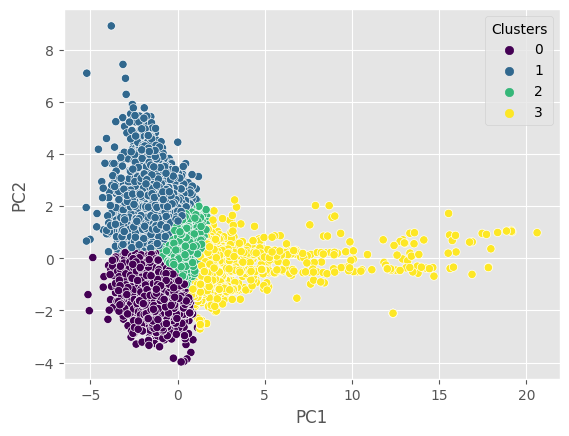

In [23]:
#Clusters
kmeans = KMeans(n_clusters=4, n_init="auto")
kmeans = kmeans.fit(pca_df)
pca_df['Clusters'] = kmeans.labels_

sns.scatterplot(x="PC1", y="PC2", hue='Clusters',  data=pca_df, palette='viridis')
plt.show()

## 3. Modeling

3.1 Import libraries

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.base import clone

from sklearn.metrics import (
    recall_score,
    accuracy_score,
    roc_auc_score,
    precision_score
)

from sklearn.model_selection import (
    GridSearchCV,
    train_test_split
)

3.2 Data Preprocessing

In [ ]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(ds.iloc[:, :-1], # X
                                                    ds.iloc[:, -1], # y
                                                    test_size=0.1,
                                                    random_state=1)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

3.3 Models evaluation

In [ ]:
def model_evaluation(model):
    '''
    In this function the model we pass is evaluated:
        1)The model is fitted
        2)We get the prediction on the test sample and the metrics

    Params:
        -model: the model that we want to evaluate
    '''

    res = pd.DataFrame()

    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    res.loc[0, ["Accuracy", \
                "RocAuc", \
                "Precision", \
                "Sensitivity", \
                "Specificity"]] = accuracy_score(y_test, pred), \
                                  roc_auc_score(y_test, pred), \
                                  precision_score(y_test, pred), \
                                  recall_score(y_test, pred, pos_label=1), \
                                  recall_score(y_test, pred, pos_label=0)

    return res

In [ ]:
def grid_search_res(model, param_grid):
    '''
    The model is passed to the GridSearchCV in order to try all
    the parameters combination then we return the results

    Params:
        -model: the model that we want to fit
        -param_grid: the dictionary of hyper-parameters we want to try
    '''

    model_gs = GridSearchCV(
        model,
        param_grid,
        cv=10,
        scoring='accuracy',
        return_train_score=False,
        n_jobs=-1,
        verbose=0)

    model_gs.fit(X_train, y_train)
    cv_res = pd.DataFrame(model_gs.cv_results_)[['params', 'mean_test_score']]

    return cv_res

3.4 Linear Discriminant Analys and Logistic Regression

In [ ]:
recap = {}
recap["LDA"] = model_evaluation(LinearDiscriminantAnalysis())
recap["Logistic"] = model_evaluation(LogisticRegression())

3.5 Support Vector Machines

In [ ]:
param_grid = {'C' : [0.01, 0.1, 1, 10, 100]}
cv_res = grid_search_res(SVC(), param_grid)
print(cv_res.iloc[cv_res['mean_test_score'].argmax(),])

recap["SVM"] = model_evaluation(SVC(C = 100))

params             {'C': 100}
mean_test_score       0.83343
Name: 4, dtype: object


3.6 K-nearest Neighbors

In [ ]:
param_grid = {'n_neighbors' : list(range(1, 20))}
cv_res = grid_search_res(KNeighborsClassifier(), param_grid)
print(cv_res.iloc[cv_res['mean_test_score'].argmax(),])

recap["KNN"] = model_evaluation(KNeighborsClassifier(n_neighbors = 6))

params             {'n_neighbors': 6}
mean_test_score              0.843631
Name: 5, dtype: object


3.7 Random Forest

In [ ]:
param_grid = {'n_estimators' : [100, 500, 1000]}
cv_res = grid_search_res(RandomForestClassifier(), param_grid)
print(cv_res.iloc[cv_res['mean_test_score'].argmax(),])

recap["RandomForest"] = model_evaluation(RandomForestClassifier(n_estimators = 1000))

params             {'n_estimators': 1000}
mean_test_score                  0.884247
Name: 2, dtype: object


3.8 Models scores

In [ ]:
pd.concat(recap).droplevel(1)

,Accuracy,RocAuc,Precision,Sensitivity,Specificity
LDA,0.780595,0.713940,0.733412,0.520168,0.907711
Logistic,0.783627,0.720282,0.732491,0.536134,0.904430
SVM,0.834895,0.783378,0.822246,0.633613,0.933142
KNN,0.845645,0.789225,0.867133,0.625210,0.953240
RandomForest,0.882304,0.851130,0.864374,0.760504,0.941756


3.9 Model comparison <br>
<i>The aim of this section is to compare and look at the differences between a model trained on the whole dataset (all month included) and a model trained on a single month<i/>

In [ ]:
def model_comp(model_reference):
    '''
    A model is passed and then we compare two different approaches:
        -The first model (A) is trained on a sample of a single month
         and tested on a sample (C) of the same month
        -The second model (B) is trained on a sample of the whole
         dataset (all month included) and tested on the same test
         sample (C) of the first model
    This is repeated for each month and then the performance of both
    models is shown with a lineplot.

    Params:
        -model_reference: the model that we want to compare
    '''

    accuracy_month_model = []
    accuracy_total_model = []

    #Create a 'Total Model' that is trained on the whole dataset (all month)
    model = clone(model_reference)

    total_model = model.fit(X_train, y_train)

    for month in range(1, 13):
        #Create the train-set and test-set for the current month
        model = clone(model_reference)
        ds_month = ds[ds["arrival_month"] == month]

        m_X_train, m_X_test, m_y_train, m_y_test = train_test_split(ds_month.iloc[:, :-1], #X
                                                                    ds_month.iloc[:, -1],  #y
                                                                    test_size=0.2)

        #Accuracy of the model trained on all month with the test set of the current month
        accuracy_total_model.append(
            accuracy_score(y_true=m_y_test,
                           y_pred=total_model.predict(scaler.fit_transform(m_X_test))))

        #Drop the month feature because the model trained on a single month doesn't need it
        m_X_train = scaler.fit_transform(m_X_train.drop(['arrival_month'], axis=1))
        m_X_test = scaler.fit_transform(m_X_test.drop(['arrival_month'], axis=1))

        month_model = model.fit(m_X_train, m_y_train)

        #Accuracy of the model trained on the current month with the test set of the current month
        accuracy_month_model.append(accuracy_score(y_true=m_y_test,
                                                   y_pred=month_model.predict(m_X_test)))

    #Plotting the results
    plot_results(model_reference.__class__.__name__,
                 accuracy_month_model,
                 accuracy_total_model)

In [ ]:
def plot_results(model_name, accuracy_month_model, accuracy_total_model):
    '''
    The results of model_comp() are passed and then plotted with a lineplot

    Params:
        -model_name: the name of the model
        -accuracy_month_model: accuracy of the month model for each month
        -accuracy_total_model: accuracy of the total model for each month
    '''

    plt.plot(range(1, 13),
             accuracy_month_model,
             c="blue",
             linestyle='solid',
             marker = ".",
             markersize = 10)

    plt.plot(range(1, 13),
             accuracy_total_model,
             c="red",
             linestyle='dashed',
             marker = "v",
             markersize = 10)

    plt.xlabel("Month")
    plt.ylabel("Accuracy")

    plt.yticks(ticks=[x/100 for x in range(60, 101, 5)])
    plt.xticks(ticks=range(1,13),
                labels=["January", "February", "March", "April",
                        "May", "June", "July", "August",
                        "September", "October", "November", "Dicember"],
                rotation = 45)

    plt.legend(["Month model", "Total model"], loc = 'lower right')

    diff = []
    for month in range(0, 12):
        diff.append(abs(accuracy_total_model[month] - accuracy_month_model[month]))

    plt.title(f"Accuracy {model_name} (Avg. diff. = {round(sum(diff)/12, 2)})")
    plt.show()

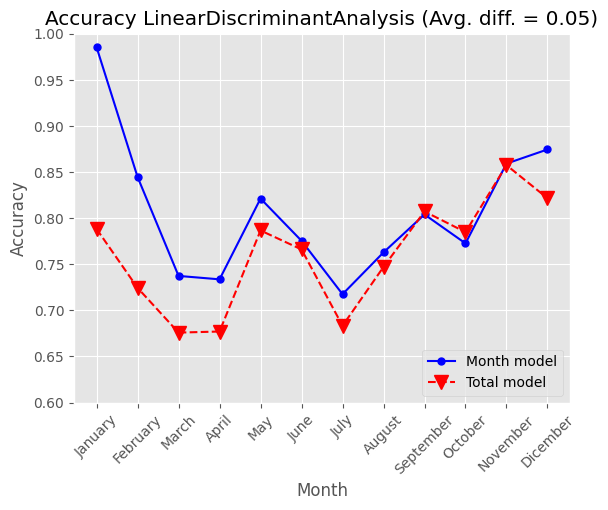

In [ ]:
model_comp(LinearDiscriminantAnalysis())

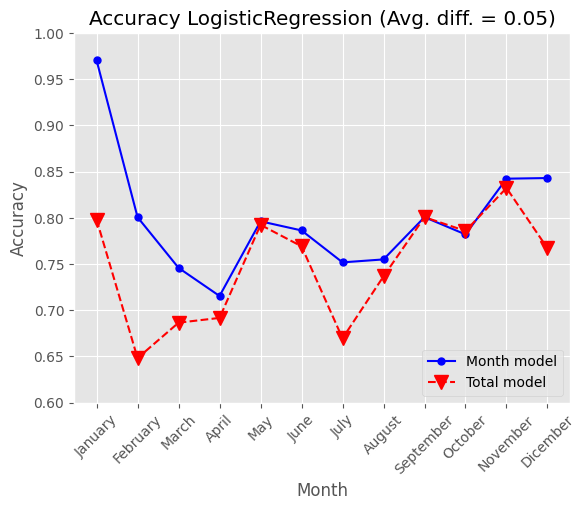

In [ ]:
model_comp(LogisticRegression(max_iter = 2000))

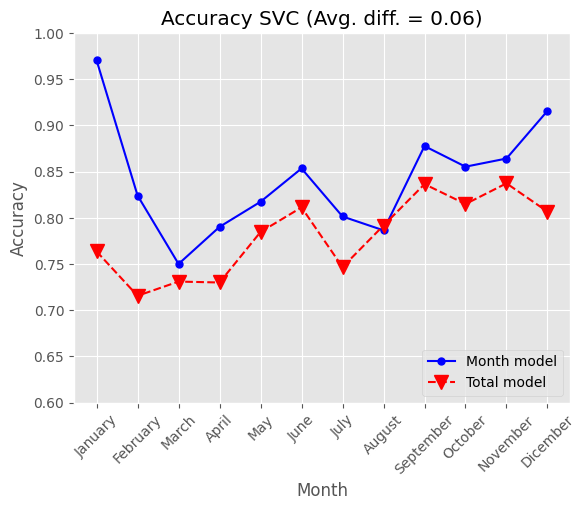

In [ ]:
model_comp(SVC(C = 100))

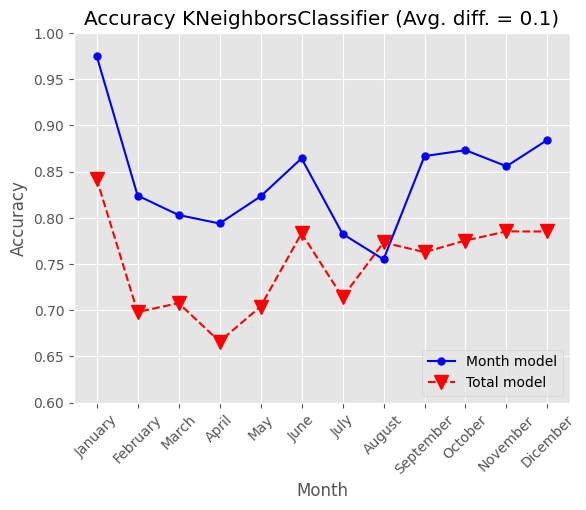

In [ ]:
model_comp(KNeighborsClassifier(n_neighbors = 2))

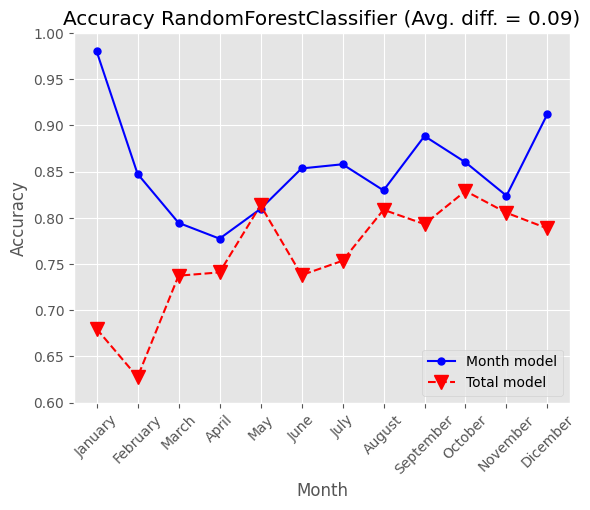

In [ ]:
model_comp(RandomForestClassifier(n_estimators = 1000))